# Quantum Fourier Transform(QFT)

## 0 Background

  When we solve a problem in computer science or mathematics, one of the most useful ways is to transform it into some other problem for which its solution is known. One such transformation is the *discrete Fourier transform*. Compared to *discrete Fourier transform*, quantum Fourier transform is essentially the same transformation. However, quantum Fourier transform can be implemented as the dynamics for a quantum computer. So quantum Fourier transform has important significance in quantum computation.

## 1 Algorithm Introduction

### 1.1 Discrete Fourier Transform(DFT)

Discrete Fourier transform is the mapping transformation from a vector of complex numbers ($x_{0}$,$x_{1}$,…,$x_{N-1}$) to another vector of complex numbers ($y_{0}$,$y_{1}$,…,$y_{N-1}$), defined by:
$$
y_{k}=\frac{1}{\sqrt{N}}\sum_{j=0}^{N-1}x_{j}e^{2\pi ijk/N}   \quad (1)
$$
​	Discrete Fourier transform is exactly the orthonormal basis transformation，the equation above is representing one basis as another basis.

### 1.2 Quantum Fourier Transform(QFT)

Equivalently, quantum Fourier transform is replacing basis vectors with quantum states $\left | 0  \right \rangle$,$\left | 1  \right \rangle$,…,$\left | N-1  \right \rangle$,defined by：
$$
\left|j\right\rangle=\frac{1}{\sqrt{N}}\sum_{k=0}^{N-1}e^{2\pi ijk/N}\left|k\right\rangle   \quad (2)
$$
​	So an arbitrary state could be written as：
$$
\sum_{j=0}^{N-1}x_{j}\left|j\right\rangle=\sum_{k=0}^{N-1}y_{k}\left|k\right\rangle \quad (3)
$$
​	The coefficients $y_{k}$ are the outputs of the discrete Fourier transform of the amplitudes $x_{j}$. It is obvious from the definition that quantum Fourier transform is an unitary transform，the proof is given in the chapter 1.5.

### 1.3 The product representation of QFT

​	To simplify computation in the following，we take $N=2^n$，where $n$ is some integer. It is helpful to use the binary representation:
$$
j=j_{1}j_{2}…j_{n}.j_{l}j_{l+1}…j_{m}=j_{1}2^{n-1}+…+j_{n}2^{0}+j_{l}/2^{1}+…+j_{m}/2^{m-l+1} \quad (4)
$$
​	The quantum Fourier transform can be given the following useful product representation：
$$
\left|j_{1},\dots,j_{n}\right\rangle=\frac{(\left|0\right\rangle+e^{2\pi i0.j_{n}}\left|1\right\rangle)(\left|0\right\rangle+e^{2\pi i0.j_{n-1}j_{n}}\left|1\right\rangle)…(\left|0\right\rangle+e^{2\pi i0.j_{1}…j_{n}}\left|1\right\rangle)}{2^{n/2}}  \quad (5)
$$
​	The equation (2) is equivalent to the equation (5). With a little algebra, we could prove as below：
$$
\begin{equation}
\begin{aligned}
   \left|j\right\rangle&=\frac{1}{2^{n/2}}\sum_{k=0}^{2^n-1}e^{2\pi ijk/2^{n}}\left|k\right\rangle  \\
&=\frac{1}{2^{n/2}}\sum_{k_{1}=0}^{1}…\sum_{k_{n}=0}^{1}e^{2\pi ij(\sum_{l=1}^{n}k_{l}2^{-l})}\left|k_1…k_n\right\rangle    \\
&=\frac{1}{2^{n/2}}\sum_{k_{1}=0}^{1}…\sum_{k_{n}=0}^{1}\bigotimes\limits_{l=1}\limits^{n}e^{2\pi ijk_{l}2^{-l}}\left|k_l\right\rangle  \\
&=\frac{1}{2^{n/2}}\bigotimes\limits_{l=1}\limits^{n}[\sum_{k_{l}=0}^{1}e^{2\pi ijk_{l}2^{-1}\left|k_l\right\rangle}] \\
&=\frac{1}{2^{n/2}}\bigotimes\limits_{l=1}\limits^{n}[\left|0\right\rangle+e^{2\pi ij2^{-l}}\left|1\right\rangle] \\
&=\frac{(\left|0\right\rangle+e^{2\pi i0.j_{n}}\left|1\right\rangle)(\left|0\right\rangle+e^{2\pi i0.j_{n-1}j_{n}}\left|1\right\rangle)…(\left|0\right\rangle+e^{2\pi i0.j_{1}…j_{n}}\left|1\right\rangle)}{2^{n/2}}
\end{aligned} \quad (6)
\end{equation}
$$
​	We commute tensor products with summation symbol and use the binary representation. The product representation is so useful to allow us to construct an efficient quantum circuit computing the Fourier transform, which could be seen in the next chapter.

### 1.4 QFT circuit

The product representation makes it easy to derive an efficient circuit as below：

![1](.\QFT-circuit-pic.jpg)

​	The gate $R_k$ denotes the unitary transformation:
$$
R_k\equiv \begin{bmatrix}
1  & 0\\
0  & e^{2\pi i/2^k}
\end{bmatrix} \quad (7)
$$
​	Applying the Hadamard gate to the first bit produces the state：
$$
H\left | j_1  \right \rangle=\frac{1}{\sqrt{2}}\left(\left|0\right\rangle+e^{2\pi i0.j_1}\left|1\right\rangle\right) \quad (7)
$$
​	If $j_1=1$，$e^{2\pi i0.j_1}=-1$. If $j_1=0$，$e^{2\pi i0.j_1}=1$.

​	Then we apply the $controlled$-$R_2$ gate，If $j_2=0$，$e^{2\pi i0.j_1}=e^{2\pi i0.j_1j_2}$, If $j_2=1$，$e^{2\pi i0.j_1}·e^{2\pi i/2^2}=e^{2\pi i0.j_1j_2}$. So the coefficient of qubit $\left|1\right\rangle$ turns to $e^{2\pi i0.j_1j_2}$.

​	We continue applying the $controlled$-$R_3$ ,$controlled$-$R_4$,……,through $controlled$-$R_n$ gates，each of which adds an extra bit:
$$
\frac{1}{\sqrt{2}}\left(\left|0\right\rangle+e^{2\pi i0.j_1…j_{n}}\left|1\right\rangle\right)
$$
​	That is the expression for the first term from the right. Next, we perform a similar procedure on the second qubit. We continue this fashion for each qubit, giving a final state. After the last Swap operation to reverse the order of the qubits, we see the desired output of the quantum Fourier transform as the equation (5).

### 1.5 Additional remarks for QFT

The construction of circuit proves that quantum Fourier transform is unitary，since each gate in the circuit is unitary.

​	For concreteness it may help to look at the explicit matrix representation for the two qubit quantum Fourier transform, using $\omega = e^{\frac{2\pi i}{4}}= i$, as:
$$
\frac{1}{2} \begin{bmatrix}
1  & 1 & 1 & 1 \\
1  & i & -1 & -i \\
1  & -1 & 1 & -1 \\
1  & -i & -1 & -i
\end{bmatrix}
$$
​	The time complexity of quantum Fourier transform could be inferred from the derivation in the chapter 1.4. We start by doing a Hadamard gate and $n-1$ conditional rotations on the first qubit - a total of n gates. Continuing applying gates to the second qubit through the last qubit in this way , we see that $\frac{n(n+1)}{2}$ gates are required, plus the gate involved in the swaps. At most $n/2$ swaps are required, and each swap can be accomplished using three controlled-gates. Therefore, this circuit provides a $\Theta (n^2)$ algorithm for performing the quantum Fourier transform.

​	In contrast, the best classical algorithm(Fast Fourier Transform) on $2^n$ elements uses $\Theta (n2^n)$ gates. So theoretically, quantum Fourier transform has advantages of shorter required time and fast implementation.

## 2 Circuit demonstration

### 2.1 example：QFT of three qubits

If we do a quantum Fourier transform on a triple qubit state  $\left|5\right\rangle=\left|101\right\rangle$. According to the equation (5)，we could give the final state：
$$
\begin{equation}
\begin{aligned}
\frac{1}{\sqrt{8} } \left(\left|0\right\rangle+e^{2\pi i*5/2}\left|1\right\rangle\right)\left(\left|0\right\rangle+e^{2\pi i*5/4}\left|1\right\rangle\right)\left(\left|0\right\rangle+e^{2\pi i*5/8}\left|1\right\rangle\right) \\
=\frac{1}{\sqrt{8}} \left(\left|0\right\rangle\left|1\right\rangle\right)\left(\left|0\right\rangle+i\left|1\right\rangle\right)\left(\left|0\right\rangle+(-\frac{\sqrt{2}}{2}-i\frac{\sqrt{2}}{2})\left|1\right\rangle\right) \\
=\frac{1}{\sqrt{8}}\left|000\right\rangle+(-\frac{1}{4}-\frac{i}{4})\left|001\right\rangle+\frac{i}{\sqrt{8}}\left|010\right\rangle+(\frac{1}{4}-\frac{i}{4})\left|011\right\rangle \\
-\frac{1}{\sqrt{8}}\left|100\right\rangle+(\frac{1}{4}+\frac{i}{4})\left|101\right\rangle-\frac{i}{\sqrt{8}}\left|110\right\rangle+(-\frac{1}{4}+\frac{i}{4})\left|111\right\rangle
\end{aligned} \quad (8)
\end{equation}
$$
​	That is the output of the quantum Fourier transform on the qubit $\left|5\right\rangle$. Next, we use python program and experimental tasks to verify the output.

### 2.2 QFT circuit construction

Next we use python to construct and simulate a QFT circuit：

In [10]:
#import packages we need
from quafu import QuantumCircuit,Task,simulate
import numpy as np
import matplotlib.pyplot as plt
from numpy import pi

#use loops to apply Rk-gate and Hadamard-gate
def qft_rotation(circuit,n):
    for i in range(n):
        circuit.h(i)#apply Hadamard-gate
        for k in range(n-i-1):
            circuit.cp(i+1+k,i,np.pi/(2 ** (k+1))) #apply n-i-1 Rk-gates，In pyquafu the function names cp
            #the first parameter is the control qubit，the second parameter is the target qubit，the third parameter is the rotation phase
    return circuit

def swap_register(circuit, n):  # reverse the order
    for qubit in range(n // 2):
        circuit.swap(qubit, n - qubit - 1)  # use swap function
    return circuit

def qft(circuit, n):
    qft_rotation(circuit, n)
    swap_register(circuit, n)
    return circuit

#four qubit circuit demonstration:
qc=QuantumCircuit(4)
qft(qc,4)
qc.draw_circuit(width=4)

q[0]  --H----P(1.571)----P(0.785)----P(0.393)-------------------------------------------------------x-------
                |           |           |                                                           |       
q[1]  ----------*-----------|-----------|--------H----P(1.571)----P(0.785)--------------------------|----x--
                            |           |                |           |                              |    |  
q[2]  ----------------------*-----------|----------------*-----------|--------H----P(1.571)---------|----x--
                                        |                            |                |             |       
q[3]  ----------------------------------*----------------------------*----------------*--------H----x-------


In [11]:
#simulate to verify the triple qubit circuit
qc_3=QuantumCircuit(3)
qc_3.x(0)
qc_3.x(2)
qft(qc_3,3)
qc_3.draw_circuit(width=4)
simu_res = simulate(qc_3,output='state_vector')
print(simu_res.get_statevector())

q[0]  --X----H----P(1.571)----P(0.785)--------------------------x--
                     |           |                              |  
q[1]  ---------------*-----------|--------H----P(1.571)---------|--
                                 |                |             |  
q[2]  --X------------------------*----------------*--------H----x--
[ 3.53553391e-01+0.j         -3.53553391e-01+0.j
  4.32978028e-17+0.35355339j -4.32978028e-17-0.35355339j
 -2.50000000e-01-0.25j        2.50000000e-01+0.25j
  2.50000000e-01-0.25j       -2.50000000e-01+0.25j      ]


We could see that the outputs fit well with the outcome in the chapter 2.1, indicating the success of simulation verification.

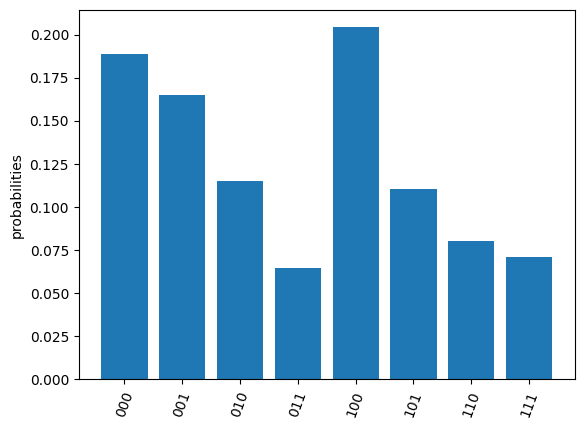

In [12]:
#experimental tasks
task = Task()
task.config(backend='ScQ-P18',shots=8000,compile=True)
res = task.send(qc_3)
res.plot_probabilities()

The expected results should be that every qubit has a probability of 0.125. There are some errors in the actual results but they are within the acceptable range.